# Interpolação/Polinômio/Forma de Newton (em construção)

Na aula passada vimos que, dados $n+1$ pontos $(x_0,y_0)\ldots,(x_n,y_n)$ a Interpolação Polinomial é uma aproximação para um ponto $z$ a partir de um polinômio de grau (no máximo $n$) [ver applet](http://math.mercyhurst.edu/~lwilliams/Applets/Interpolation.html). Estes pontos podem ser experimentais ou calculados a partir de uma função conhecida.

## Revisão da Interpolação de Lagrange

A **Interpolação de Lagrange** é um método baseado na combinação linear de $n+1$ polinômios de grau $n$, cuja complexidade de tempo é $\mathcal{O}(n^2)$. O polinômio de Lagrange é dado pela fórmula
$$
L_n(x) = \sum_{i=0}^n y_i \prod_{j=0,j\neq i}^n \frac{(x-x_j)}{(x_i-x_j)}.
$$
Mais precisamente, o número de operações aritméticas realizadas ao avaliar a expressão acima é:
* Adições: $2n^2 + 3n + 1$
* Multiplicações: $2n^2 + 3n + 1$
* Divisões: $n+1$
É possível reduzir quase 50% do número de adições e multiplicações ao se construir a matriz $G$ que vimos em sala. No entanto, o cálculo de $G_d$ e dos $G_i$'s pode ocasionar *overflow* ou *underflow* e não é usado na prática.

Pior do que isso, mesmo a implementação clássica do método sofre problemas de instabilidade devido às divisões e multiplicações.

## Interpolação de Newton

Hoje veremos a **Interpolação de Newton**, que é construída a partir da soma de polinômios de grau crescente $0, 1, \ldots, n$. Uma vez calculada a matriz de diferenças divididas, é trivial:
* interpolar um outro ponto $z_2$ com $\mathcal{O}(n)$ operações;
* adicionar um novo ponto $(x_{n+1},y_{n+1})$ com $\mathcal{O}(n)$ operações.

Na implementação clássica da Interpolação de Lagrange, as operações anteriores necessitam que o polinômio seja completamente recalculado. Logo, tem custo $\mathcal{O}(n^2)$.

A partir do desenvolvimento feito no quadro, vimos que o polinômio de Newton é dado por

$$
P_n(x) = y_0 + \sum_{i=1}^n \omega(x_0,\ldots,x_i) \prod_{j=0}^{i-1} (x-x_j),
$$

onde $\omega(x_0,\ldots,x_i)$ é a diferença dividida de ordem $i$ em $y_0$. No livro do Algoritmos Numéricos a diferença dividida $\omega(x_0,\ldots,x_i)$ é representada por um delta cortado ao meio, com expoente $i$ seguido de $y_0$.

Veremos na aula de hoje que o número de operações aritméticas realizadas ao avaliar a expressão acima é:
* Adições: $2n^2 + 4n$
* Multiplicações: $n$
* Divisões: $\frac{n^2}{2} + \frac{n}{2}$

In [39]:
import sympy
np.set_printoptions(precision=3)
sympy.init_printing()

In [46]:
# implementacao sem o processo de Horner

import numpy as np
def PolinomioNewton(x, y, z):
    m = len(x)
    Delta = np.zeros((m,m))
    Delta[:,0] = y
    for j in range(1,m):
        for i in range(m-j):
            Delta[i,j] = (Delta[i+1,j-1] - Delta[i,j-1])/(x[i+j]-x[i])
        print(Delta)
    
    res = y[0]
    for j in range(1,m):
        prod = 1
        for k in range(j):
            prod *= z-x[k]
        res += Delta[0,j]*prod
        
    return res

In [47]:
x = np.array([.0,.2,.3,.4,.7,.9])
y = np.array([3.,2.76,2.655,2.6,3.035,4.125])
z = .1
res = PolinomioNewton(x,y,z)

[[ 3.    -1.2    0.     0.     0.     0.   ]
 [ 2.76  -1.05   0.     0.     0.     0.   ]
 [ 2.655 -0.55   0.     0.     0.     0.   ]
 [ 2.6    1.45   0.     0.     0.     0.   ]
 [ 3.035  5.45   0.     0.     0.     0.   ]
 [ 4.125  0.     0.     0.     0.     0.   ]]
[[ 3.    -1.2    0.5    0.     0.     0.   ]
 [ 2.76  -1.05   2.5    0.     0.     0.   ]
 [ 2.655 -0.55   5.     0.     0.     0.   ]
 [ 2.6    1.45   8.     0.     0.     0.   ]
 [ 3.035  5.45   0.     0.     0.     0.   ]
 [ 4.125  0.     0.     0.     0.     0.   ]]
[[ 3.    -1.2    0.5    5.     0.     0.   ]
 [ 2.76  -1.05   2.5    5.     0.     0.   ]
 [ 2.655 -0.55   5.     5.     0.     0.   ]
 [ 2.6    1.45   8.     0.     0.     0.   ]
 [ 3.035  5.45   0.     0.     0.     0.   ]
 [ 4.125  0.     0.     0.     0.     0.   ]]
[[  3.000e+00  -1.200e+00   5.000e-01   5.000e+00  -1.028e-13   0.000e+00]
 [  2.760e+00  -1.050e+00   2.500e+00   5.000e+00   6.217e-14   0.000e+00]
 [  2.655e+00  -5.500e-01   5.000e+00

In [44]:
res

In [45]:
5*z**3-2*z**2-z+3

## Reduzindo o número de operações

**Q**: Qual a complexidade de tempo e de  do algoritmo acima?

Como reduzir o número de operações realizadas no laço final? Considere o cálculo de $P_n(z)$ para

$$
    P_n(x) = a_0 + a_1 x + a_2 x^2 + \ldots a_n x^n.
$$

Para reduzir o número de multiplicações realizadas, podemos colocar $x$ em evidência:
$$
P_n(x) = a_0 + x(a_1 + a_2(x + \ldots a_n x) \ldots )
$$

Este processo é conhecido como **Processo de Horner**. Ele pode ser usado na avaliação do Polinômio de Lagrange.

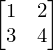

In [23]:
# renderizando as matrizes usando sympy

A = np.array([[1,2],[3,4]])
sympy.Matrix(A)